# Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

import tensorflow as tf # deep learning
from tensorflow import keras

from sklearn.model_selection import train_test_split # for splitting dataset into train and test parts

from sklearn.metrics import confusion_matrix 

from keras.optimizers import RMSprop

import seaborn as sns

# Loading Train and Test Datasets

In [2]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Exploratory Data Analysis

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

### We saw that there are numbers from 0 to 255

In [6]:
df_train["pixel300"].unique()

array([  0, 254, 253,  33, 240, 201,  88,  27,  73,  21, 128, 252, 198,
       165, 168,  46, 127,  29,  71,  17,  68, 188,  36, 255, 191,  38,
       164, 169, 133, 242, 246, 149, 101, 244, 235,  60,  93, 117, 185,
       162, 248,  13, 111, 232, 200,  25, 106,  12, 193,  65, 160, 199,
        50,  56, 231, 230,  78, 167, 170, 251, 131,  96,  66, 223, 207,
        84, 208,  48,  58, 206, 203,  10,  87,  11,  63,  61,  75,  24,
        85,  64, 217, 212,  28,  19,   3,  16,  81, 186,   4, 108,  69,
       121, 236, 192, 195, 204,   8, 129, 233, 184,  42, 158, 148, 152,
       247, 159, 218, 115, 228,  79, 135,   1,  35,  18, 238, 132, 245,
       250, 205, 202, 124, 182, 122, 142, 134, 197, 211,  76,  74,  45,
       139,  22, 166, 118, 249,  14,  43, 189, 151, 225,  80, 214, 154,
        57, 143, 156, 187,  72,  15,  89,  47, 174,   2,  39, 102, 126,
        62,  97, 163, 237,  86,  92, 104, 243,  67, 150, 221, 103, 216,
       227,  31,  83, 157, 141, 181,  49, 110, 239, 155, 196, 20

# Preprocessing

### Setting x and y

In [7]:
y = df_train["label"]
x = df_train.drop("label", axis = 1)

### Normalizing to 0 and 1

In [8]:
x = x / 255 

### Splitting data to train and validation set

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

### Determining the test data and normalizing the test data

In [10]:
x_test = df_test

x_test = x_test / 255 # normalizing

# Modeling and Predicting 

### First we try two layer with 64 neurons

In [11]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = "relu", input_shape = (784,)),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

### Optimizer configurations

In [12]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

### Here we use sparse_categorical_crossentropy loss function, because our labels are not one hot encoded, they are like = [1,5,6,8,9,0,...], if we turn our labels to one hot encoding, we should use categorical_crossentropy loss function

In [13]:
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### Fitting the train set, with these configurations and also we are giving validation data to see val_accuracy, and we save the history of fitting

In [14]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/20
525/525 [==============================] - 3s 4ms/step - loss: 0.6663 - accuracy: 0.8122 - val_loss: 0.2302 - val_accuracy: 0.9342
Epoch 2/20
525/525 [==============================] - 1s 3ms/step - loss: 0.2038 - accuracy: 0.9409 - val_loss: 0.1682 - val_accuracy: 0.9525
Epoch 3/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1406 - accuracy: 0.9597 - val_loss: 0.1590 - val_accuracy: 0.9518
Epoch 4/20
525/525 [==============================] - 2s 3ms/step - loss: 0.1085 - accuracy: 0.9664 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 5/20
525/525 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9736 - val_loss: 0.1370 - val_accuracy: 0.9605
Epoch 6/20
525/525 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9784 - val_loss: 0.1340 - val_accuracy: 0.9623
Epoch 7/20
525/525 [==============================] - 2s 3ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1272 - val_accuracy: 0.9636
Epoch 

### Printing accuracy rate

In [15]:
_, accuracy = model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9707
Accuracy: 97.07


### Visualizing Model accuracy and Model loss

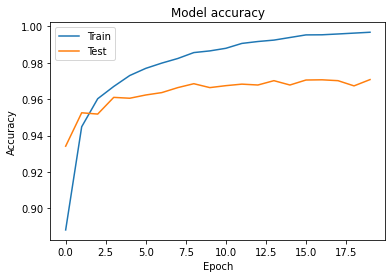

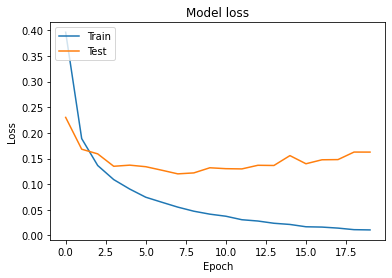

In [16]:
import matplotlib.pyplot as plt 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

# Convolutional Neural Network

In [17]:
x_train.shape, x_val.shape

((33600, 784), (8400, 784))

### Reshaping x_train and x_val and x_test. Here we use .values it convert dataframe to ndarray.

In [18]:
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1) # 28x28 pixel
x_val = x_val.values.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

### Building our CNN Model

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(2,2), 
    keras.layers.Flatten(), # it flattens the layer
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [20]:
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)

In [21]:
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [22]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/20
525/525 [==============================] - 10s 18ms/step - loss: 0.7061 - accuracy: 0.7876 - val_loss: 0.2108 - val_accuracy: 0.9367
Epoch 2/20
525/525 [==============================] - 9s 17ms/step - loss: 0.1876 - accuracy: 0.9419 - val_loss: 0.1612 - val_accuracy: 0.9506
Epoch 3/20
525/525 [==============================] - 9s 18ms/step - loss: 0.1305 - accuracy: 0.9593 - val_loss: 0.1363 - val_accuracy: 0.9582
Epoch 4/20
525/525 [==============================] - 9s 18ms/step - loss: 0.1016 - accuracy: 0.9687 - val_loss: 0.0973 - val_accuracy: 0.9698
Epoch 5/20
525/525 [==============================] - 9s 17ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.0952 - val_accuracy: 0.9704
Epoch 6/20
525/525 [==============================] - 9s 17ms/step - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.0824 - val_accuracy: 0.9742
Epoch 7/20
525/525 [==============================] - 9s 17ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0780 - val_accuracy: 0.974

In [23]:
_, accuracy = model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 1s 4ms/step - loss: 0.0705 - accuracy: 0.9811
Accuracy: 98.11


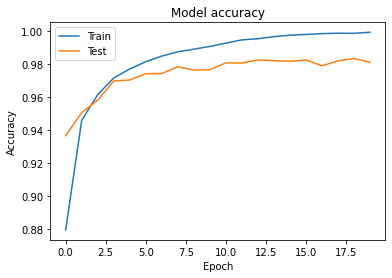

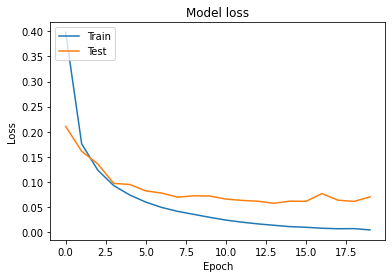

In [24]:
import matplotlib.pyplot as plt 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### Now we are adding one more Convolutional layer, hope to increase the accuracy.

In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    keras.layers.Conv2D(64, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [26]:
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)

In [27]:
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [28]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/10
525/525 [==============================] - 47s 88ms/step - loss: 0.7693 - accuracy: 0.7644 - val_loss: 0.1112 - val_accuracy: 0.9669
Epoch 2/10
525/525 [==============================] - 46s 88ms/step - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.0758 - val_accuracy: 0.9762
Epoch 3/10
525/525 [==============================] - 48s 91ms/step - loss: 0.0592 - accuracy: 0.9807 - val_loss: 0.0638 - val_accuracy: 0.9807
Epoch 4/10
525/525 [==============================] - 47s 90ms/step - loss: 0.0405 - accuracy: 0.9884 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 5/10
525/525 [==============================] - 47s 90ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0508 - val_accuracy: 0.9840
Epoch 6/10
525/525 [==============================] - 47s 90ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0561 - val_accuracy: 0.9832
Epoch 7/10
525/525 [==============================] - 47s 89ms/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.0567 - val_accuracy:

In [29]:
_, accuracy = model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 3s 11ms/step - loss: 0.0506 - accuracy: 0.9864
Accuracy: 98.64


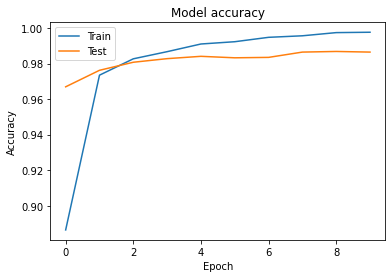

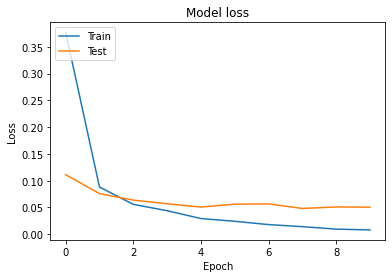

In [30]:
import matplotlib.pyplot as plt 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### Now we are trying the Dropout technique to prevent overfitting.

In [31]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    keras.layers.Conv2D(64, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2), 
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation = "softmax")
])

In [32]:
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)

In [33]:
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [34]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/10
525/525 [==============================] - 50s 94ms/step - loss: 0.8899 - accuracy: 0.7061 - val_loss: 0.1633 - val_accuracy: 0.9493
Epoch 2/10
525/525 [==============================] - 49s 93ms/step - loss: 0.1823 - accuracy: 0.9434 - val_loss: 0.0898 - val_accuracy: 0.9733
Epoch 3/10
525/525 [==============================] - 50s 94ms/step - loss: 0.1160 - accuracy: 0.9634 - val_loss: 0.0679 - val_accuracy: 0.9786
Epoch 4/10
525/525 [==============================] - 49s 93ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0639 - val_accuracy: 0.9811
Epoch 5/10
525/525 [==============================] - 49s 92ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0548 - val_accuracy: 0.9833
Epoch 6/10
525/525 [==============================] - 50s 96ms/step - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 7/10
525/525 [==============================] - 49s 93ms/step - loss: 0.0558 - accuracy: 0.9824 - val_loss: 0.0465 - val_accuracy:

In [35]:
_, accuracy = model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 3s 11ms/step - loss: 0.0432 - accuracy: 0.9879
Accuracy: 98.79


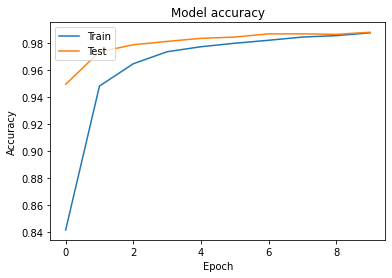

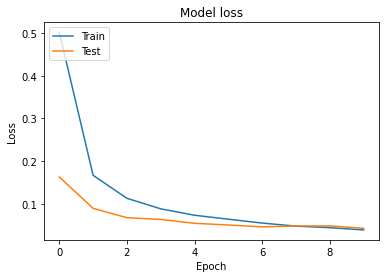

In [36]:
import matplotlib.pyplot as plt 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### Now we are trying Batch Normalization to increase convergence speed

In [37]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    keras.layers.Conv2D(64, (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(2,2), 
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = "softmax")
])

In [38]:
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)

In [39]:
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [40]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/10
525/525 [==============================] - 52s 98ms/step - loss: 0.4326 - accuracy: 0.8735 - val_loss: 0.1046 - val_accuracy: 0.9775
Epoch 2/10
525/525 [==============================] - 52s 99ms/step - loss: 0.0936 - accuracy: 0.9740 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 3/10
525/525 [==============================] - 52s 100ms/step - loss: 0.0659 - accuracy: 0.9807 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 4/10
525/525 [==============================] - 52s 100ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0529 - val_accuracy: 0.9825
Epoch 5/10
525/525 [==============================] - 50s 96ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 6/10
525/525 [==============================] - 53s 101ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9886
Epoch 7/10
525/525 [==============================] - 52s 99ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0356 - val_accura

In [41]:
_, accuracy = model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 3s 12ms/step - loss: 0.0302 - accuracy: 0.9902
Accuracy: 99.02


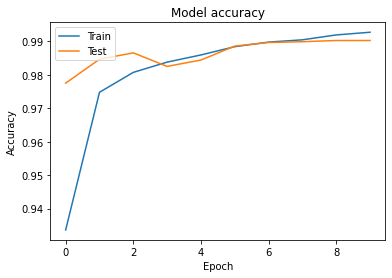

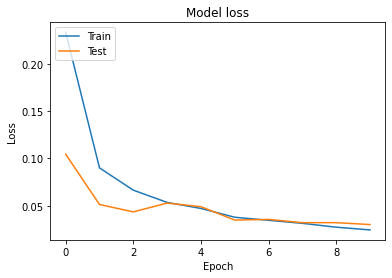

In [42]:
import matplotlib.pyplot as plt 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

### We are creating confusion matrix with heatmap to see the true positive, true negative, false positive and false negative clearly

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

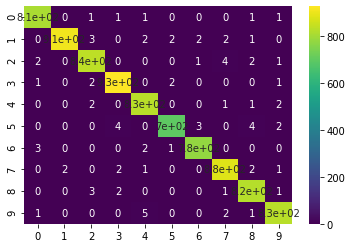

In [43]:
sns.heatmap(confusion_matrix(model.predict_classes(x_val), y_val), cmap = "viridis", annot = True)

### We are predicting x_test

In [44]:
pred = model.predict_classes(x_test)
pred

array([2, 0, 9, ..., 3, 9, 2])

### We are saving predicted classes to dataframe

In [45]:
data = {"ImageId": list(range(1,28001)), "Label": pred}
result = pd.DataFrame(data)

# Saving dataframe to csv file

In [46]:
result.to_csv("result.csv", index=False)

# Saving Model

### If we want to save our model, here the code:

In [47]:
model.save("final_model/")

# Loading Model

### If we want to load our model, here the code:

In [48]:
final_model = keras.models.load_model("final_model/")

### We did not fit the data, we just evaluated the x_val, because we fitted and saved the model before.

In [49]:
_, accuracy = final_model.evaluate(x_val, y_val)
print("Accuracy: %.2f" % (accuracy*100))

263/263 [==============================] - 3s 12ms/step - loss: 0.0302 - accuracy: 0.9902
Accuracy: 99.02
